In [10]:
import numpy as np
from scipy.sparse import coo_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from mgcpy.independence_tests.mgc.mgc import MGC

In [2]:
edge_list_A_file = open("sub-NDARAA536PTU_acq-64dir_dwi_JHU.edgelist", "r")
edge_list_A = np.array([[int(t) for t in line.split()] for line in edge_list_A_file.readlines()])
node_list_A = sorted(list(set([int(i) for i, j, w in edge_list_A])))
adj_matrix_A = np.array(coo_matrix((edge_list_A[:, 2], (edge_list_A[:, 0]-1, edge_list_A[:, 1]-1)), shape=(len(node_list_A), len(node_list_A))).todense())
edge_list_A_file.close()
# print(adj_matrix_A.shape)

In [3]:
edge_list_B_file = open("sub-NDARAD481FXF_acq-64dir_dwi_JHU.edgelist", "r")
edge_list_B = np.array([[int(t) for t in line.split()] for line in edge_list_B_file.readlines()])
node_list_B = sorted(list(set([int(i) for i, j, w in edge_list_B])))
adj_matrix_B = np.array(coo_matrix((edge_list_B[:, 2], (edge_list_B[:, 0]-1, edge_list_B[:, 1]-1)), shape=(len(node_list_B), len(node_list_B))).todense())
edge_list_B_file.close()
# print(adj_matrix_B.shape)

In [4]:
mgc = MGC(adj_matrix_A, adj_matrix_B, None)
p_value, metadata = mgc.p_value()

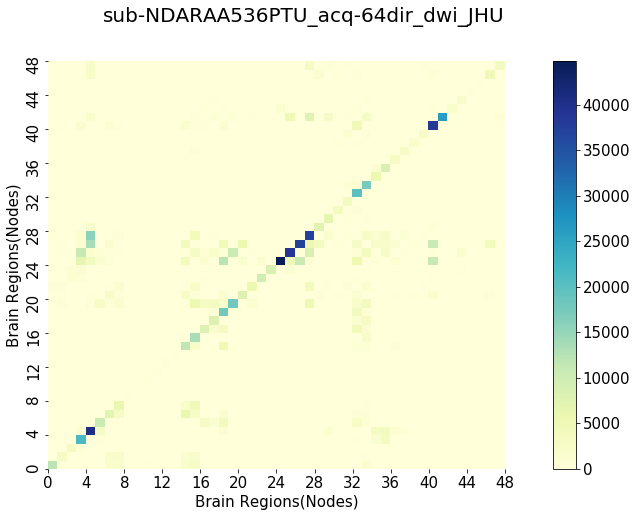

In [19]:
# Define two rows for subplots
fig, (ax, cax) = plt.subplots(ncols=2, figsize=(9.45, 7.5),  gridspec_kw={"width_ratios":[1, 0.05]})
# Draw heatmap
# ax = sns.heatmap(metadata["local_correlation_matrix"], cmap="YlGnBu", ax=ax, cbar=False)
ax = sns.heatmap(adj_matrix_A, cmap="YlGnBu", ax=ax, cbar=False)
# colorbar
fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
ax.invert_yaxis()
# optimal_scale = metadata["optimal_scale"]
# ax.scatter(optimal_scale[0], optimal_scale[1], marker='X', s=200, color='red') 

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlabel('Brain Regions(Nodes)', fontsize=15)
ax.set_ylabel('Brain Regions(Nodes)', fontsize=15) 
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
cax.xaxis.set_tick_params(labelsize=15)
cax.yaxis.set_tick_params(labelsize=15)

fig.suptitle('sub-NDARAA536PTU_acq-64dir_dwi_JHU', fontsize=20)

plt.show()

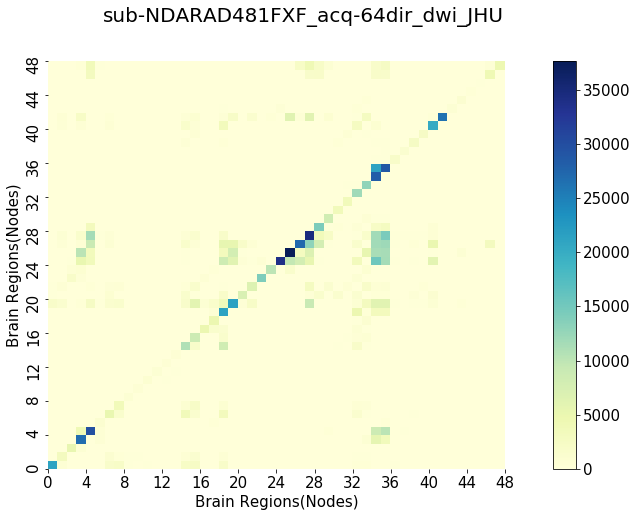

In [20]:
# Define two rows for subplots
fig, (ax, cax) = plt.subplots(ncols=2, figsize=(9.45, 7.5),  gridspec_kw={"width_ratios":[1, 0.05]})
# Draw heatmap
# ax = sns.heatmap(metadata["local_correlation_matrix"], cmap="YlGnBu", ax=ax, cbar=False)
ax = sns.heatmap(adj_matrix_B, cmap="YlGnBu", ax=ax, cbar=False)
# colorbar
fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
ax.invert_yaxis()
# optimal_scale = metadata["optimal_scale"]
# ax.scatter(optimal_scale[0], optimal_scale[1], marker='X', s=200, color='red') 

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlabel('Brain Regions(Nodes)', fontsize=15)
ax.set_ylabel('Brain Regions(Nodes)', fontsize=15) 
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
cax.xaxis.set_tick_params(labelsize=15)
cax.yaxis.set_tick_params(labelsize=15)

fig.suptitle('sub-NDARAD481FXF_acq-64dir_dwi_JHU', fontsize=20)

plt.show()

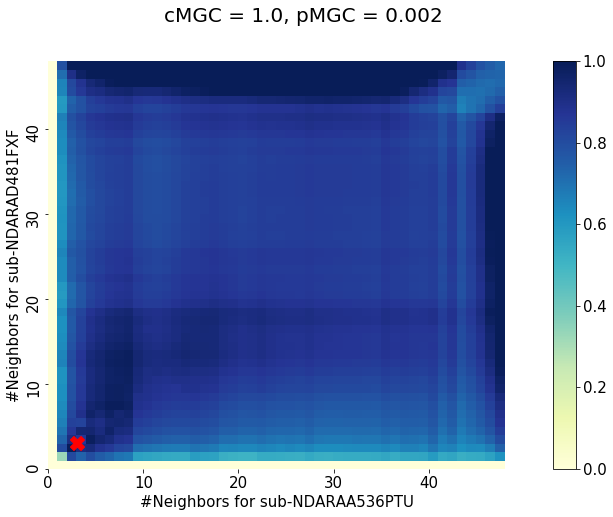

In [22]:
# Define two rows for subplots
fig, (ax, cax) = plt.subplots(ncols=2, figsize=(9.45, 7.5),  gridspec_kw={"width_ratios":[1, 0.05]})
# Draw heatmap
ax = sns.heatmap(metadata["local_correlation_matrix"], cmap="YlGnBu", ax=ax, cbar=False)
# colorbar
fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
ax.invert_yaxis()
optimal_scale = metadata["optimal_scale"]
ax.scatter(optimal_scale[0], optimal_scale[1], marker='X', s=200, color='red') 

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlabel('#Neighbors for sub-NDARAA536PTU', fontsize=15)
ax.set_ylabel('#Neighbors for sub-NDARAD481FXF', fontsize=15) 
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
cax.xaxis.set_tick_params(labelsize=15)
cax.yaxis.set_tick_params(labelsize=15)

fig.suptitle('cMGC = ' + str(metadata["test_statistic"]) + ', pMGC = ' + str(p_value), fontsize=20)

plt.show()